***Autors**: David Zheng 1666559  &  Yanhao Lin 1670136*

<h1 style="color:#4599db"; font-weight:bold>Cas Kaggle: League of Legends Diamond Ranked Games (10 min)</h1>

## 1. Introducción del proyecto

League of Legends (LoL) es un videojuego de estrategia en tiempo real y multijugador en línea (MOBA, por sus siglas en inglés) lanzado en 2009 por Riot Games, se ha convertido en uno de los videojuegos más populares del mundo, con una comunidad activa y competiciones de Esports de gran relevancia global. En LoL, dos equipos de cinco jugadores compiten en un mapa con el objetivo de destruir la base del equipo contrario. Cada jugador controla un "campeón", que es un personaje con habilidades únicas, y el éxito depende tanto de la estrategia grupal como de la habilidad individual.

El dataset seleccionado, "[League of Legends Diamond Ranked Games (10 min)](https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min)", extraído de Kaggle, contiene información detallada sobre partidas jugadas en el nivel de rango Diamante, uno de los niveles más altos en el juego, en el cual los jugadores dominan estrategias avanzadas y tienen un conocimiento profundo de las mecánicas del juego. El objetivo de este análisis es profundizar en los factores que determinan el rendimiento en las partidas de alto nivel, analizando métricas clave durante los primeros 10 minutos de juego para predecir el equipo ganador a partir de los datos de la partida.

## 2. Importación de librebrías
Antes de comenzar, importamos las librerias que utilizaremos en este proyecto.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Exploración de datos
En este apartado vamos a hacer una introducción de los datos que tiene el dataset, analizando todos los componentes y factores del juego y también los atributos que tiene el dataset.

Primero de todo, leemos el archivo .csv que contiene los datos del dataset y mostramos:

In [20]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('Dataset/high_diamond_ranked_10min.csv')
df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,0,0,17765,7.2,18967,211,69,2519,2469,21.1,1776.5,46,3,0,4,7,7,0,0,0,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,0,0,16238,7.2,19255,233,48,782,888,23.3,1623.8,12,21,1,4,6,3,0,0,0,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,0,0,15903,7.0,18032,210,45,-2416,-1877,21.0,1590.3,14,0,1,7,6,11,1,1,0,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,0,0,14459,6.6,17229,224,48,-839,-1085,22.4,1445.9,66,4,0,3,2,1,0,0,0,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


Mostramos también el tipo de todos los atributos:

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

Para familiarizarnos con el dataset, primero hemos de entender que significa cada uno de estos atributos, vamos a realizar una breve explicación para ellos. Los podemos dividir en diferentes categorias para explicar:

**General**
* gameId: Un número identificador único para cada partida.
* blueWins (Target): Indica si el equipo azul ha ganado (1) o ha perdido (0).

**Visión**
* blueWardsPlaced / redWardsPlaced: Número de wards (centinelas) colocados por cada equipo, que permiten obtener visión del mapa.
* blueWardsDestroyed / redWardsDestroyed: Número de wards (centinelas) enemigos destruidos por cada equipo.

**Combate**
* blueFirstBlood / redFirstBlood: Indica si el equipo logró la primera sangre (1) o no (0) (primer asesinato de la partida).
* blueKills / redKills: Número total de asesinatos realizados por cada equipo.
* blueDeaths / redDeaths: Número total de muertes sufridas por cada equipo.
* blueAssists / redAssists: Número de asistencias (jugadores que ayudaron en un asesinato) realizadas por cada equipo.

**Objetivos grandes**
* blueEliteMonsters / redEliteMonsters: Número total de objetivos épicos (Dragones y Heraldo de la Grieta) asegurados.
* blueDragons / redDragons: Número de dragones obtenidos.
* blueHeralds / redHeralds: Número de Heraldos de la Grieta obtenidos.

**Estructuras y economía**
* blueTowersDestroyed / redTowersDestroyed: Número de torres enemigas destruidas por cada equipo.
* blueTotalGold / redTotalGold: Oro acumulado por cada equipo.
* blueGoldDiff / redGoldDiff: Diferencia de oro entre los dos equipos (positivo si es a favor del equipo).
* blueGoldPerMin / redGoldPerMin: Tasa promedio de obtención de oro por minuto de cada equipo.

**Experiencia y nivel**
* blueAvgLevel / redAvgLevel: Nivel promedio de los campeones del equipo.
* blueTotalExperience / redTotalExperience: Experiencia acumulada por todo el equipo.
* blueExperienceDiff / redExperienceDiff: Diferencia de experiencia acumulada entre ambos equipos (positivo si es a favor del equipo).

**Minions**
* blueTotalMinionsKilled / redTotalMinionsKilled: Número total de minions asesinados por cada equipo.
* blueTotalJungleMinionsKilled / redTotalJungleMinionsKilled: Número de minions de la jungla asesinados por cada equipo.
* blueCSPerMin / redCSPerMin: Tasa de Creep Score (minions asesinados) por minuto de cada equipo.

## 4. Análisis de datos
Una vez que estamos familiarizados con el dataset, en este apartado vamos a analizar los datos mostrados anteriormente. Para hacerlo, primero tenemos que quitar las columnas que no nos afecta el análisis y también las que repiten información:
* gameId: no ayuda ya que es simplemente un identificador de las filas.
* redExperienceDiff: con blueExperienceDiff ya muetra redExperienceDiff, por ejemplo si blueExperienceDiff = +700, redExperienceDiff = -700.
* redGoldDiff: igual que redExperienceDiff.
* redFirstBlood: igual que los casos anteriores, si blueFirstBlood = 1, redFirstBlood = 0.
* blueGoldPerMin / redGoldPerMin: podemos quitar ambos atributos porque ya tenemos el atributo TotalGold que nos indica el total de oro obtenido por cada equipo y GoldPerMin simplemente es dividir el total entre 10 minutos, cosa que es innecesaria.
* blueCSPerMin / redCSPerMin: igual que GoldPerMin, ya tenemos el atributo TotalMinionsKilled y CSPerMin es simplemente una división de TotalMinionsKilled entre 10 minutos.

In [67]:
# Copiar una nueva tabla para trabajar en ella
df1 = df.copy()

# Seleccionar los atributos innecesarios
cols_to_delete = ['gameId', 'redExperienceDiff', 'redGoldDiff', 'redFirstBlood', 'blueGoldPerMin', 'redGoldPerMin', 
                  'blueCSPerMin', 'redCSPerMin']

# Eliminar dichos atributos
df1 = df1.drop(cols_to_delete, axis=1)
df1

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,redWardsPlaced,redWardsDestroyed,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,15,6,6,9,8,0,0,0,0,16567,6.8,17047,197,55
1,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,12,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52
2,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,15,3,11,7,14,0,0,0,0,17285,6.8,17254,203,28
3,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,15,2,5,4,10,0,0,0,0,16478,7.0,17961,235,47
4,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,17,2,6,6,7,1,1,0,0,17404,7.0,18313,225,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,4,5,1,1,0,0,17765,7.2,18967,211,69,2519,2469,46,3,4,7,7,0,0,0,0,15246,6.8,16498,229,34
9875,1,54,0,0,6,4,8,1,1,0,0,16238,7.2,19255,233,48,782,888,12,21,4,6,3,0,0,0,0,15456,7.0,18367,206,56
9876,0,23,1,0,6,7,5,0,0,0,0,15903,7.0,18032,210,45,-2416,-1877,14,0,7,6,11,1,1,0,0,18319,7.4,19909,261,60
9877,0,14,4,1,2,3,3,1,1,0,0,14459,6.6,17229,224,48,-839,-1085,66,4,3,2,1,0,0,0,0,15298,7.2,18314,247,40


Una vez quitada la columna gameId, vamos a mostrar el heatmap y la matriz de correlación:

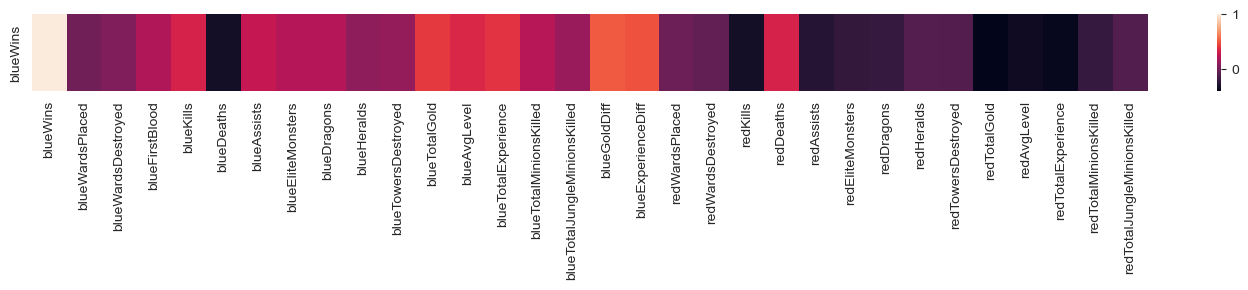

In [68]:
# Crear Heatmap respecto Target (blueWins)
blueWins_correlation = df1.corr()['blueWins'].to_frame().T 
plt.subplots(figsize=(18, 1))
sns.heatmap(blueWins_correlation)
plt.show()

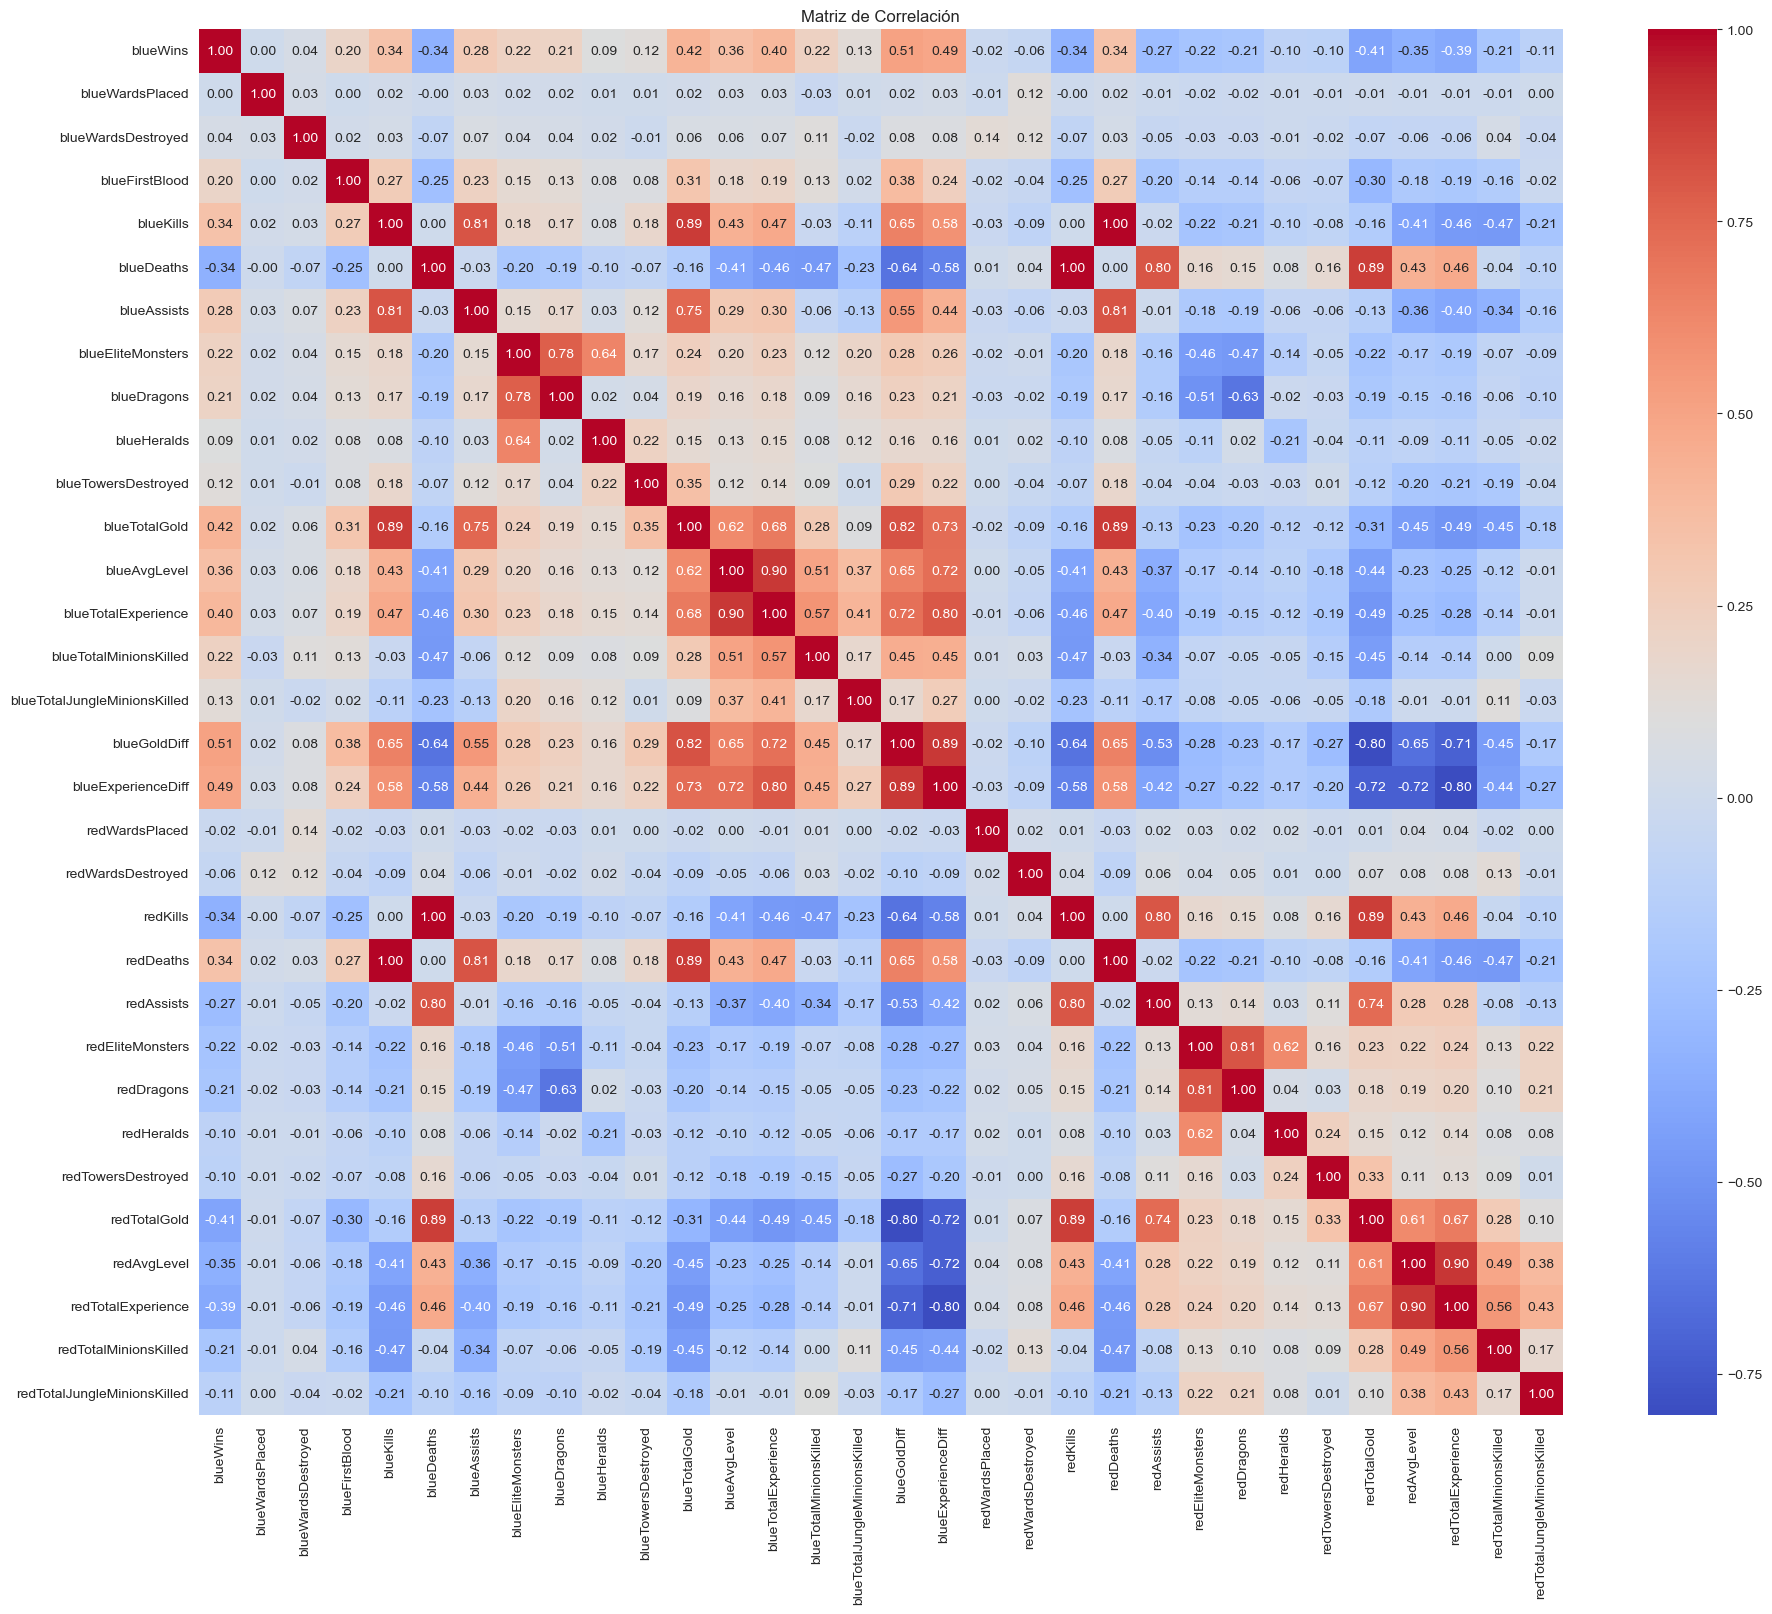

In [70]:
# Crear Matriz de correlación con todos los valores
correlation_matrix = df1.corr()
plt.figure(figsize=(22, 18))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

Basando en la matriz de correlación, que nos ayuda a identificar relaciones entre las variables, podemos filtrar y quitar aquellas columnas que tienen poca correlación con la variable target.

Mostramos los valores concretos de las correlaciones y los ordenamos para visualizar mejor:

In [71]:
# Correlaciones con la variable objetivo
correlations_with_target = correlation_matrix["blueWins"].sort_values(key=abs, ascending=False)

# Mostrar las correlaciones
print(correlations_with_target)

blueWins                        1.000000
blueGoldDiff                    0.511119
blueExperienceDiff              0.489558
blueTotalGold                   0.417213
redTotalGold                   -0.411396
blueTotalExperience             0.396141
redTotalExperience             -0.387588
blueAvgLevel                    0.357820
redAvgLevel                    -0.352127
redKills                       -0.339297
blueDeaths                     -0.339297
redDeaths                       0.337358
blueKills                       0.337358
blueAssists                     0.276685
redAssists                     -0.271047
blueTotalMinionsKilled          0.224909
blueEliteMonsters               0.221944
redEliteMonsters               -0.221551
blueDragons                     0.213768
redTotalMinionsKilled          -0.212171
redDragons                     -0.209516
blueFirstBlood                  0.201769
blueTotalJungleMinionsKilled    0.131445
blueTowersDestroyed             0.115566
redTotalJungleMi

A partir de esta información, podemos definir un umbral de correlación para determinar qué variables conservar, por ejemplo,  |correlación| > 0,2.

In [72]:
# Filtrar variables con correlación significativa (por ejemplo, mayor que 0.2)
corr_threshold = 0.2
significant_vars = correlations_with_target[abs(correlations_with_target) > corr_threshold]

# Mostrar las variables significativas
print(significant_vars)

blueWins                  1.000000
blueGoldDiff              0.511119
blueExperienceDiff        0.489558
blueTotalGold             0.417213
redTotalGold             -0.411396
blueTotalExperience       0.396141
redTotalExperience       -0.387588
blueAvgLevel              0.357820
redAvgLevel              -0.352127
redKills                 -0.339297
blueDeaths               -0.339297
redDeaths                 0.337358
blueKills                 0.337358
blueAssists               0.276685
redAssists               -0.271047
blueTotalMinionsKilled    0.224909
blueEliteMonsters         0.221944
redEliteMonsters         -0.221551
blueDragons               0.213768
redTotalMinionsKilled    -0.212171
redDragons               -0.209516
blueFirstBlood            0.201769
Name: blueWins, dtype: float64


In [74]:
# Crear una nueva tabla con las variables seleccionadas
selected_columns = significant_vars.index.tolist()
df_filtered = df1[selected_columns]
df_filtered

,blueWins,blueGoldDiff,blueExperienceDiff,blueTotalGold,redTotalGold,blueTotalExperience,redTotalExperience,blueAvgLevel,redAvgLevel,redKills,blueDeaths,redDeaths,blueKills,blueAssists,redAssists,blueTotalMinionsKilled,blueEliteMonsters,redEliteMonsters,blueDragons,redTotalMinionsKilled,redDragons,blueFirstBlood
0,0,643,-8,17210,16567,17039,17047,6.6,6.8,6,6,9,9,11,8,195,0,0,0,197,0,1
1,0,-2908,-1173,14712,17620,16265,17438,6.6,6.8,5,5,5,5,5,2,174,0,2,0,240,1,0
2,0,-1172,-1033,16113,17285,16221,17254,6.4,6.8,11,11,7,7,4,14,186,1,0,1,203,0,0
3,0,-1321,-7,15157,16478,17954,17961,7.0,7.0,5,5,4,4,5,10,201,1,0,0,235,0,0
4,0,-1004,230,16400,17404,18543,18313,7.0,7.0,6,6,6,6,6,7,210,0,1,0,225,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,2519,2469,17765,15246,18967,16498,7.2,6.8,4,4,7,7,5,7,211,1,0,1,229,0,1
9875,1,782,888,16238,15456,19255,18367,7.2,7.0,4,4,6,6,8,3,233,1,0,1,206,0,0
9876,0,-2416,-1877,15903,18319,18032,19909,7.0,7.4,7,7,6,6,5,11,210,0,1,0,261,1,0
9877,0,-839,-1085,14459,15298,17229,18314,6.6,7.2,3,3,2,2,3,1,224,1,0,1,247,0,1
